# Overview
Microsoft Company, the well known tech giant is now interested in dabbling in te film industry. Usable data was gathered from [Box Office Mojo](https://www.boxofficemojo.com/?ref_=bo_nb_cso_mojologo) to generate a descriptive analysis on how best Microsoft can optimize their debut for the most success. 

## Business Problem
Microsoft is bored. They have tackled the tech industry and needs a new project. They have decided to enter the film industry to try to see how they fair against the most seasonsed film studios. I am currently tasked with exploring the kinds of data that is out on the web that I could utilize to generable usable insights for Microsoft as they come up in this field.

# Data 

First, we need to import the necessary libraries and packages to collect our data

In [1]:
import requests
from bs4 import BeautifulSoup 

## Web-scraping for data
After establishing the libraries, we can gather the location of our data on the Box Office Mojo webpage. 

In [2]:
# send a request for the html from the website
bom = requests.get("https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?area=XWW")
# use BeautifulSoup package to read the html
bom_soup = BeautifulSoup(bom.content, 'html.parser')
# find the table element that correcsonds to the desired data and grab all the rows
bom_soups = bom_soup.find('table').findAll('tr')

We can check the length of this list to make sure we have the correct number of elements. 

In [3]:
len(bom_soups)

201

This tells us that we have 200 movies listed as well as an extra row for the header. Now, we can remove the header and work with only the data by calling on all elements but the first and moving from there.

## Grabbing the data
Index through the html to find where the data is located.

In [4]:
# index all elements except the first
bom_movies = bom_soups[1:]

Now, we need to create a loop that will go though each element in our *bom_movies* list and present the desiered data in a complied list called *bom_top_200*.

In [5]:
# start by indexing the first element to start small
bom_movies[0]
# find the element that references the movie title
bom_movies[0].find('a')
# get the text
bom_movies[0].find('a').get_text()

'Avengers: Endgame'

Using the code layed out above, we can create a for loop that will iterate through each element and retrieve the movie title.

In [6]:
# create an empty list
bom_titles = []
# for each element in our list, get the title text
for x in bom_movies:
    titles = x.find('a').get_text()
    bom_titles.append(titles)

We can take a look at our list to make sure it worked and even check the length, which should be 200, becasue remebre, we removed the first row which was the header

In [7]:
len(bom_titles)

200

Great! We have all of our movie titles. 
Now we can gather the rememaing data using a similar method.

In [8]:
# index into the first movie
bom_movies[0]
# find the table elemnt that contains the year
bom_movies[0].findAll('a')
# grab that element by indexing into it
bom_movies[0].findAll('a')[-1]
# get the text
bom_movies[0].findAll('a')[-1].get_text()

'2019'

Now we can create a loop that will generate a list of all movie years. And check the length to make sure our data is complete,

In [9]:
bom_years = []
for x in bom_movies:
    years = x.findAll('a')[-1].get_text()
    bom_years.append(years)
len(bom_years)

200

Now, to gather the data for the elemenets within the 'td' parsing, which is our remaining data, we can simply index into each elemnt of our list and assign it to a new list like we have been doing. 

> **Note:** This method only works under the certainty that the data is properly arranged for each movie.

In [10]:
# new lists to contain the data
bom_ww_gross = []
bom_dom_gross = []
bom_fore_gross = []
dom_perc = []
fore_perc = []
for x in bom_movies:
    ww = x.findAll('td')[2].get_text()
    dom = x.findAll('td')[3].get_text()
    domp = x.findAll('td')[4].get_text()
    fore = x.findAll('td')[5].get_text()
    forep = x.findAll('td')[-2].get_text()
# append all of the elemts you just generated to their respective lists
    bom_ww_gross.append(ww)
    bom_dom_gross.append(dom)
    bom_fore_gross.append(fore)
    dom_perc.append(domp)
    fore_perc.append(forep)

Now that was a lot, but to check and make sure we have all of out data, we can print the length of each list

In [11]:
print(len(bom_ww_gross))
print(len(bom_dom_gross))
print(len(bom_fore_gross))
print(len(dom_perc))
print(len(fore_perc))

200
200
200
200
200


Sucess! Now that we have all of our desired data neatly stored into lists, we can create our data frame.

## Generating the dataframe
Use the data collected to form the dataframe.

In [12]:
# import pandas as the necessary package
import pandas as pd

Using the DataFrame method from pandas, we can create our dataframe from scratch

In [13]:
BOM_top_200 = pd.DataFrame({'Title': bom_titles, 
              'Year': bom_years, 
              'Worldwide Lifetime Gross': bom_ww_gross, 
              'Domestic Lifetime Gross': bom_dom_gross, 
              'Domestic %': dom_perc, 
              'Foreign Lifetime Gross': bom_fore_gross, 
              'Foreign %': fore_perc})
# let's look at out new dataframe
BOM_top_200

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,"$2,797,800,564","$858,373,000",30.7%,"$1,939,427,564",69.3%
1,Avatar,2009,"$2,790,439,092","$760,507,625",27.2%,"$2,029,931,467",72.8%
2,Titanic,1997,"$2,195,170,133","$659,363,944",30%,"$1,535,806,189",70%
3,Star Wars: Episode VII - The Force Awakens,2015,"$2,068,454,133","$936,662,225",45.3%,"$1,131,791,908",54.7%
4,Avengers: Infinity War,2018,"$2,048,359,754","$678,815,482",33.1%,"$1,369,544,272",66.9%
...,...,...,...,...,...,...,...
195,The Revenant,2015,"$532,950,503","$183,637,894",34.5%,"$349,312,609",65.5%
196,The Meg,2018,"$530,259,473","$145,443,742",27.4%,"$384,815,731",72.6%
197,Ralph Breaks the Internet,2018,"$529,323,962","$201,091,711",38%,"$328,232,251",62%
198,Hotel Transylvania 3: Summer Vacation,2018,"$528,583,774","$167,510,016",31.7%,"$361,073,758",68.3%


Amazing, we have manually generated our data frame via web scraping! As mentioned before, this is not the optimal way to web scrape a webpage to generate a data frame, but it is gives you an idea of what is going on when you are creating your for loop. Now we can save this **uncleaned** data as a backup csv file.

In [14]:
BOM_top_200.to_csv('unclean_BOM_top_200.csv')

# Data Cleaning
Now that we have our data frame, we can begin cleaning it. 

In [15]:
# load the csv into a new varibale for easy access and display
# set the index column equal to zero to avoind unwanted indexing
bom_df = pd.read_csv('unclean_BOM_top_200.csv', index_col=0)

## Exploring the data
Exploring the data entails looking through to see if there are any oddities or mimssing values. 

In [16]:
# check the dtypes for each value in each column to ensure our data is consistant
bom_df.dtypes

Title                       object
Year                         int64
Worldwide Lifetime Gross    object
Domestic Lifetime Gross     object
Domestic %                  object
Foreign Lifetime Gross      object
Foreign %                   object
dtype: object

From the code above, we can see that the dtypes for our our numeric values are not floats or integers like they should be. Let's try to find out why:

In [17]:
# check for any missing values
bom_df.isnull().sum()

Title                       0
Year                        0
Worldwide Lifetime Gross    0
Domestic Lifetime Gross     0
Domestic %                  0
Foreign Lifetime Gross      0
Foreign %                   0
dtype: int64

There are no missing values. Let's what else could be the problem?

## Cleaning

In [18]:
# explore the first few rows
bom_df.head(3)

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,"$2,797,800,564","$858,373,000",30.7%,"$1,939,427,564",69.3%
1,Avatar,2009,"$2,790,439,092","$760,507,625",27.2%,"$2,029,931,467",72.8%
2,Titanic,1997,"$2,195,170,133","$659,363,944",30%,"$1,535,806,189",70%


Already, we can see that there are dollar signs in gross columns and percentage signs in percet columns. These charatcers are what turns our numberic integer into an object. We need to remove them using the map function with the .strip() method.

In [19]:
# left strip $ and right strip % for each respective column
bom_df['Worldwide Lifetime Gross'] = bom_df['Worldwide Lifetime Gross'].map(lambda x: x.lstrip('$'))
bom_df['Domestic Lifetime Gross'] = bom_df['Domestic Lifetime Gross'].map(lambda x: x.lstrip('$'))
bom_df['Foreign Lifetime Gross'] = bom_df['Foreign Lifetime Gross'].map(lambda x: x.lstrip('$'))
bom_df['Domestic %'] = bom_df['Domestic %'].map(lambda x: x.rstrip('%'))
bom_df['Foreign %'] = bom_df['Foreign %'].map(lambda x: x.rstrip('%'))
bom_df.head(3)

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,"2,797,800,564","858,373,000",30.7,"1,939,427,564",69.3
1,Avatar,2009,"2,790,439,092","760,507,625",27.2,"2,029,931,467",72.8
2,Titanic,1997,"2,195,170,133","659,363,944",30,"1,535,806,189",70


Now let's check the dtypes again

In [20]:
bom_df.dtypes

Title                       object
Year                         int64
Worldwide Lifetime Gross    object
Domestic Lifetime Gross     object
Domestic %                  object
Foreign Lifetime Gross      object
Foreign %                   object
dtype: object

We still seem to be in some trouble. It looks like the commas need to be removed aswell. We can do this using the str.replace() method.

In [21]:
# remove all commas from numeric values then check dtype
bom_df['Worldwide Lifetime Gross'] = bom_df['Worldwide Lifetime Gross'].str.replace(',', '')
bom_df['Domestic Lifetime Gross'] = bom_df['Domestic Lifetime Gross'].str.replace(',', '')
bom_df['Foreign Lifetime Gross'] = bom_df['Foreign Lifetime Gross'].str.replace(',', '')
bom_df.dtypes

Title                       object
Year                         int64
Worldwide Lifetime Gross    object
Domestic Lifetime Gross     object
Domestic %                  object
Foreign Lifetime Gross      object
Foreign %                   object
dtype: object

There is still an issue. To remedy this identify crisis, we need to now convert our object into a numeric element type using pd.to_numeric().

In [22]:
# change the dtypes for all gross values from object to integer
bom_df['Worldwide Lifetime Gross'] = pd.to_numeric(bom_df['Worldwide Lifetime Gross'], errors='coerce')
bom_df['Domestic Lifetime Gross'] = pd.to_numeric(bom_df['Domestic Lifetime Gross'], errors='coerce')
bom_df['Foreign Lifetime Gross'] = pd.to_numeric(bom_df['Foreign Lifetime Gross'], errors='coerce')
# check the updeated dtypes
bom_df.dtypes

Title                       object
Year                         int64
Worldwide Lifetime Gross     int64
Domestic Lifetime Gross      int64
Domestic %                  object
Foreign Lifetime Gross       int64
Foreign %                   object
dtype: object

Almost there! There are still periods in our percent columns. We need to make those ojbects floats. 

In [23]:
# convert the remaining uncessecary objects into floats
bom_df['Domestic %'] = pd.to_numeric(bom_df['Domestic %'], errors='coerce')
bom_df['Foreign %'] = pd.to_numeric(bom_df['Foreign %'], errors='coerce')
# final dtypes check (hopefully)
bom_df.dtypes

Title                        object
Year                          int64
Worldwide Lifetime Gross      int64
Domestic Lifetime Gross       int64
Domestic %                  float64
Foreign Lifetime Gross        int64
Foreign %                   float64
dtype: object

Wow! We have now successfully cleaned out Box Office Mojo data! We can tell this by noting the titles are strings which are ojbects in pandas, our gross values are integers, and our percentages are floats, as they should be due to them being decimals.

Just like before, we will save this **cleaned** data frame into a new csv backup file.

In [24]:
bom_df.to_csv('clean_BOM_top_200.csv')

# Data Analytics
Now we can analyze our data inpreparation for visualizations. 

For the analysis of Box Office Mojo data, we will look at the top 5 movies that have earned the most grossing worldwide. From this we can narrow it down even more to see which movies did better domestically vs overseas. From this we can generate insights as to the genre Microsoft may consider for their movie. 

In [25]:
# import numpy package for content readability
import numpy as np
df = pd.read_csv('clean_BOM_top_200.csv', index_col=0)

Even though we generated this data already sorted from the webpage, it is always best to ensure you data is formated correctly for analysis.

In [26]:
# first check to make sure the order of your sorted values is corect
df.sort_values(by = 'Worldwide Lifetime Gross', ascending = 0)
# grab the top 5
df.sort_values(by = 'Worldwide Lifetime Gross', ascending = 0)[0:5]

,Title,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
0,Avengers: Endgame,2019,2797800564,858373000,30.7,1939427564,69.3
1,Avatar,2009,2790439092,760507625,27.2,2029931467,72.8
2,Titanic,1997,2195170133,659363944,30.0,1535806189,70.0
3,Star Wars: Episode VII - The Force Awakens,2015,2068454133,936662225,45.3,1131791908,54.7
4,Avengers: Infinity War,2018,2048359754,678815482,33.1,1369544272,66.9


Great, now we know how we want our values sorted. Time to analyze the gross earnings accoriding to these parameters. 

In [27]:
# frist, make sure the values are sorted by ww lifetime gross
df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)
# isoltae the column needed
df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Worldwide Lifetime Gross']
# grab the top 5 values
df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Worldwide Lifetime Gross'][0:5].values
# assign to a variable
wwy = df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Worldwide Lifetime Gross'][0:10].values/10**9
# grab the names of the top 5 values and assign to a variable
wwx = df.sort_values(by = ['Worldwide Lifetime Gross'], ascending = False)['Title'][0:10].values
# repeat for domestic and foreign values
# domestic values
domy = df.sort_values(by = ['Domestic Lifetime Gross'], ascending = False)['Domestic Lifetime Gross'][0:5].values/10**6
domx = df.sort_values(by = ['Domestic Lifetime Gross'], ascending = False)['Title'][0:5].values
# foreign values
fory = df.sort_values(by = ['Foreign Lifetime Gross'], ascending = False)['Foreign Lifetime Gross'][0:5].values/10**9
forx = df.sort_values(by = ['Foreign Lifetime Gross'], ascending = False)['Title'][0:5].values


Call on the decribe method to get a descriptive summary on the statics of our data.

In [28]:
df.describe()

,Year,Worldwide Lifetime Gross,Domestic Lifetime Gross,Domestic %,Foreign Lifetime Gross,Foreign %
count,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000
mean,2011.015000,8.534427e+08,2.997719e+08,35.211500,5.536708e+08,64.788500
std,7.116036,3.458209e+08,1.414445e+08,10.503295,2.477057e+08,10.503295
min,1977.000000,5.279659e+08,1.543547e+06,0.300000,1.973000e+08,36.000000
25%,2007.750000,6.238815e+08,2.091848e+08,29.375000,4.011319e+08,58.325000
50%,2013.000000,7.664030e+08,2.860709e+08,34.800000,4.929737e+08,65.200000
75%,2016.000000,9.670434e+08,3.633033e+08,41.675000,6.426432e+08,70.625000
max,2019.000000,2.797801e+09,9.366622e+08,64.000000,2.029931e+09,99.700000


From here we can see that the average worldwide gross earning for the top 200 movies of all time is $853,442,700. From this value we can provide a more detailed analysis that will show us the top 10 movies that earned above average in their worldwide grossing. Another thing we could do is see if we can find a coorelation between release year and the average grossing from Domestic releases.

In [29]:
index = df.groupby(['Year'])['Domestic %'].mean().index
values = df.groupby(['Year'])['Domestic %'].mean().values

Now we have our variable esablished. We can now plot and visualize our data.

# Data Visualizations

In [30]:
# import necessary packages
import matplotlib.pyplot as plt
# for more visually pleasing visualizations, import seasborn package
import seaborn as sns
# Set aesthetic parameters
sns.set()
# select a syle for your plots
plt.style.use('seaborn-pastel')

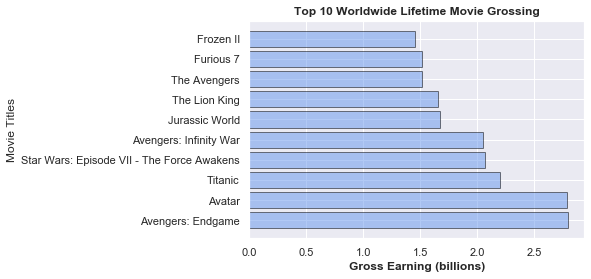

In [31]:
# generate plot
fig,ax = plt.subplots()
ax.barh(wwx,wwy, color = 'cornflowerblue', edgecolor = 'black', alpha = 0.5)
# decorate
ax.set_title('Top 10 Worldwide Lifetime Movie Grossing', weight = 'bold')
ax.set_xlabel('Gross Earning (billions)', weight = 'bold')
ax.set_ylabel('Movie Titles')
# save as images for easy acess
plt.savefig('top_10_ww_grossing.png')

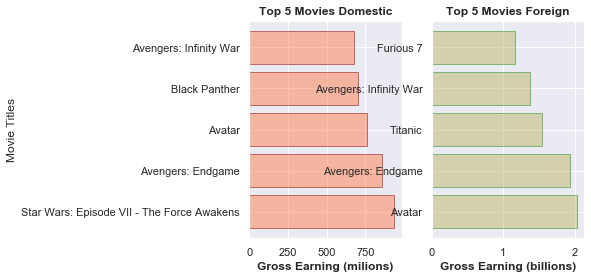

In [32]:
fig, (ax_dom, ax_fore) = plt.subplots(1,2)
ax_dom.barh(domx,domy, color = 'coral', ec = 'darkred', alpha = 0.5)
ax_dom.set_title('Top 5 Movies Domestic', weight = 'bold')
ax_dom.set_xlabel('Gross Earning (milions)', weight = 'bold')
ax_dom.set_ylabel('Movie Titles')
ax_fore.barh(forx,fory, color = 'darkkhaki', ec = 'forestgreen', alpha = 0.5)
ax_fore.set_title('Top 5 Movies Foreign', weight = 'bold')
ax_fore.set_xlabel('Gross Earning (billions)', weight = 'bold')

plt.savefig('top_5_dom_fore_grossing.png')

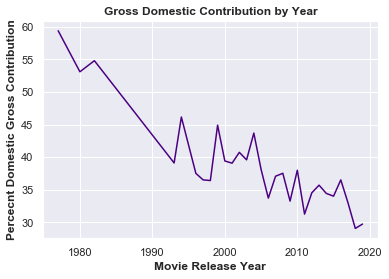

In [33]:
fig, ax = plt.subplots()
ax.plot(index,values, color = 'indigo')
ax.set_title('Gross Domestic Contribution by Year', weight = 'bold')
ax.set_xlabel('Movie Release Year', weight = 'bold')
ax.set_ylabel('Percecnt Domestic Gross Contribution', weight = 'bold')

plt.savefig('dom_perc_year_trend.png')

# Conclusion
From these findings, we can make an insightful conclusion that if Microsoft may want to expand overseas to promote their first movie. 